## Statsbomb API

In [112]:
import numpy as np
from statsbombpy import sb

COMPETITION_ID = 9
SEASON_ID = 281

sb.competitions().head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882


In [ ]:
matches = sb.matches(competition_id=COMPETITION_ID, season_id=SEASON_ID)
matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3895302,2024-04-14,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Werder Bremen,5,0,available,...,2024-05-10T17:03:59.613154,29,Regular Season,BayArena,Harm Osmers,Xabier Alonso Olano,Ole Werner,1.1.0,2,2
1,3895292,2024-04-06,15:30:00.000,Germany - 1. Bundesliga,2023/2024,Union Berlin,Bayer Leverkusen,0,1,available,...,2024-05-12T21:08:37.897296,28,Regular Season,Stadion An der Alten Försterei,Benjamin Brand,Nenad Bjelica,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,...,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,...,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,...,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2


In [146]:
events = sb.events(match_id=3895302)
events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection',
       'block_save_block', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected',
       'pass_end_l

In [151]:
events = events[["timestamp","player","location","type","shot_outcome"]]
mask = events["shot_outcome"].notna()
events[mask].head()

,timestamp,player,location,type,shot_outcome
4093,00:06:48.773,Leonardo Bittencourt,"[100.4, 35.1]",Shot,Blocked
4094,00:07:40.953,Piero Martín Hincapié Reyna,"[114.6, 33.5]",Shot,Saved
4095,00:11:08.471,Julián Malatini,"[106.2, 55.8]",Shot,Blocked
4096,00:13:16.073,Jonathan Tah,"[113.9, 47.4]",Shot,Blocked
4097,00:16:00.956,Granit Xhaka,"[89.2, 42.5]",Shot,Blocked


In [115]:
sb.events(match_id=3895302, split=True, flatten_attrs=False).keys()

dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'miscontrols', 'dribbles', 'duels', 'interceptions', 'ball_recoverys', 'dispossesseds', 'blocks', 'foul_committeds', 'foul_wons', 'errors', 'shots', 'goal_keepers', 'injury_stoppages', 'referee_ball_drops', '50/50s', 'clearances', 'offsides', 'dribbled_pasts', 'player_offs', 'player_ons', 'half_ends', 'substitutions', 'bad_behaviours', 'tactical_shifts', 'shields'])

In [ ]:
games = (matches["home_team"] == "Bayer Leverkusen") | (matches["away_team"] == "Bayer Leverkusen")
game_ids = matches[games]["match_id"]
game_ids = game_ids.to_list()

shot_attempts_locations = []

for id in game_ids:
    shots = sb.events(match_id=id, split=True, flatten_attrs=False)["shots"]
    mask = shots["player"] == "Florian Wirtz"
    wirtz_shots = shots[mask]
    locations = wirtz_shots["location"].to_list()
    
    if len(locations) != 0:
        shot_attempts_locations.append(locations)



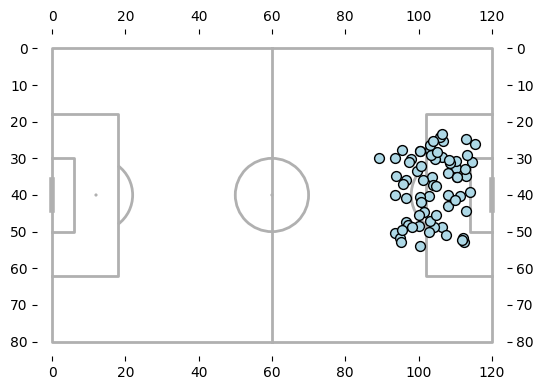

In [ ]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import numpy as np

X = np.vstack(shot_attempts_locations)

pitch = Pitch(label=True, tick=True)
fig, ax = pitch.draw(figsize=(8, 4))

ax.scatter(X[:, 0], X[:, 1], c='lightblue', s=50, edgecolors='black', zorder=5)

# Display the plot
plt.show()

In [1]:
import json
import os

# Bundesliga
competition_id = 9
season_id = 281

# open Euro 2024
with open(f'../data/matches/{competition_id}/{season_id}.json', 'r') as file:
    data = json.load(file)

# get match ids
match_ids = []
for n in range(len(data)):
    match_ids.append(data[n].get('match_id'))

# check if event data exists
for match_id in match_ids:
    if os.path.exists(f'../data/events/{match_id}.json'):
        pass
    else:
        print(f"File does not exist: {match_id}.json")

match_ids[0:2]

[3895302, 3895292]

In [2]:
with open(f'../data/events/{3895302}.json', 'r') as file:
    data = json.load(file)

data[2]

{'id': '1f956a2b-ece0-475b-8802-e82ed922c307',
 'index': 3,
 'period': 1,
 'timestamp': '00:00:00.000',
 'minute': 0,
 'second': 0,
 'type': {'id': 18, 'name': 'Half Start'},
 'possession': 1,
 'possession_team': {'id': 904, 'name': 'Bayer Leverkusen'},
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'team': {'id': 904, 'name': 'Bayer Leverkusen'},
 'duration': 0.0,
 'related_events': ['79b90fbb-2cfd-419b-90f4-f0e5980c47d3']}

In [3]:
event_id = data[4]["id"]
halft_time = data[4]["period"]
timestamp = data[4]["timestamp"]
team = data[4]["team"]
player = data[4]["player"]
position = data[4]["position"]
location = data[4]["location"]
duration = data[4]["duration"]
data[4]["pass"]

{'recipient': {'id': 12299, 'name': 'Marvin Ducksch'},
 'length': 2.1540658,
 'angle': 2.7610862,
 'height': {'id': 1, 'name': 'Ground Pass'},
 'end_location': [59.0, 40.9],
 'body_part': {'id': 40, 'name': 'Right Foot'},
 'type': {'id': 65, 'name': 'Kick Off'}}

In [4]:
shot_attempts_pos = []
goals_pos = []

for event in data:
    # shot attempts
    if event["type"].get("id") == 16 and event["player"].get("name") == "Florian Wirtz":
        shot_attempts_pos.append(event["location"])
    
shot_attempts_pos

[[93.8, 34.8], [106.3, 29.6], [93.5, 40.1], [103.6, 35.0], [106.4, 48.8]]